In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read the data
data_path = "/Users/Daniel/Data-Science/Data/Retail/Social_Network_Ads/"
data = pd.read_csv(data_path + 'Social_Network_Ads.csv')

In [3]:
# Inspect the data
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Recode the data: Gender as Male
mapper = {'Male': 1, 'Female': 0}
data['Male'] = data['Gender'].map(mapper)
data.to_csv(data_path + 'Social_Network_Ads_processed.csv')

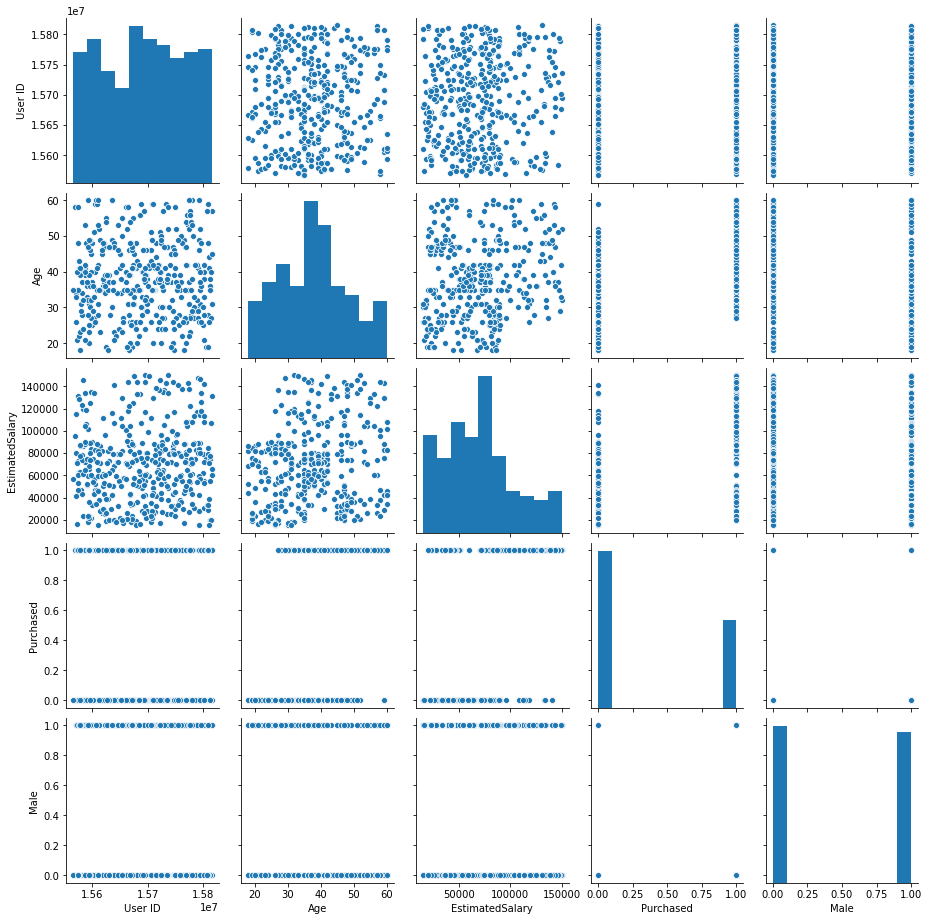

In [5]:
# Exploratory analysis
import seaborn as sns
sns.pairplot(data) # Correlation matrix

In [6]:
# Baseline analysis: Logistic Regression
from statsmodels.discrete.discrete_model import Logit
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
def LogisticRegression_based_on_statsmodels(y_pd_series, X_pd_series):
    # fit_intercept
    model = Logit(endog=y_pd_series, exog=add_constant(X_pd_series))
    result = model.fit()
    print(result.summary())
    print(result.summary2())
    return (result.params.values)

X = data[['Male','Age','EstimatedSalary']]
y = data['Purchased']
LogisticRegression_based_on_statsmodels(y, X)

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 16 Aug 2020   Pseudo R-squ.:                  0.4711
Time:                        23:41:54   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Male          

array([-1.27836341e+01,  3.33843388e-01,  2.36969401e-01,  3.64411904e-05])

In [7]:
# Gender does not appear to be useful here
# For simplicity, Gender is discarded from further analysis, while Age and EstimatedSalary will be the predictors of interest

# Prepare for the training and testing sets
X = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 12345)

In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit to the data and then transform it
X_test = scaler.transform(X_test) # 	uses a previously computed mean and std to scale the data

In [9]:
# Training and predicting
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3) # default criterion = 'gini'
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [10]:
# Model evaluation
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy Score: 0.87


array([[54,  5],
       [ 8, 33]])

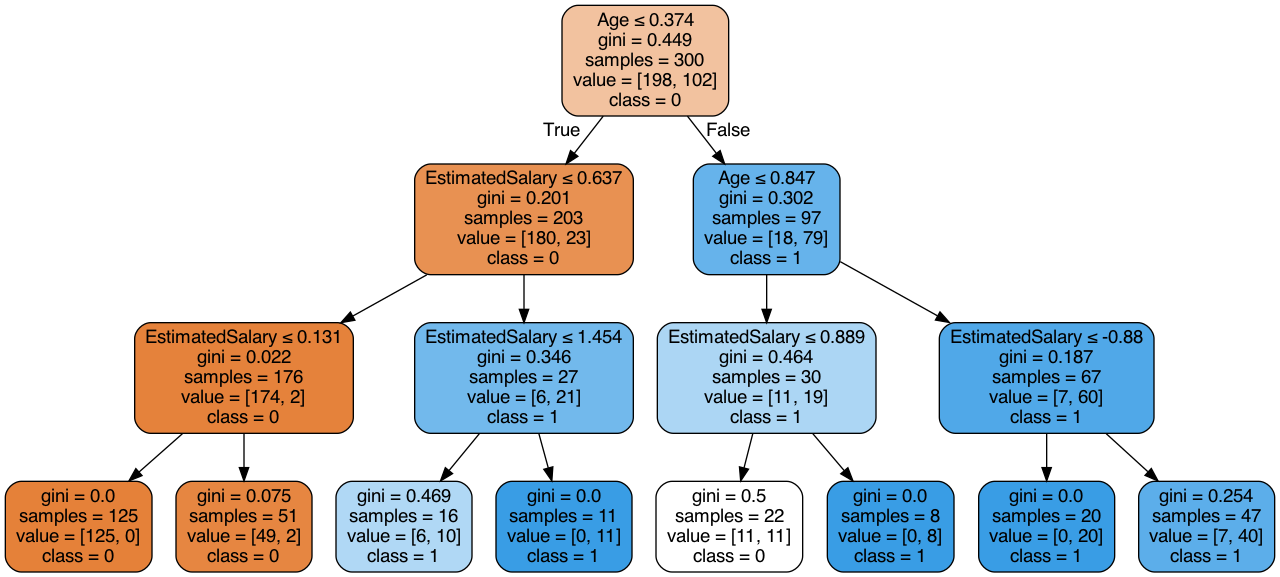

In [11]:
# Visualization of the tree
from sklearn.tree import export_graphviz
import io
from IPython.display import Image
import pydotplus
dot_data = io.StringIO()
feature_cols = ['Age','EstimatedSalary' ]
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [12]:
# Using entropy as the criterion
# Training and predicting
classifier = DecisionTreeClassifier(max_depth=3, criterion="entropy")
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [13]:
# Model evaluation
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

Accuracy Score: 0.85


array([[54,  5],
       [10, 31]])

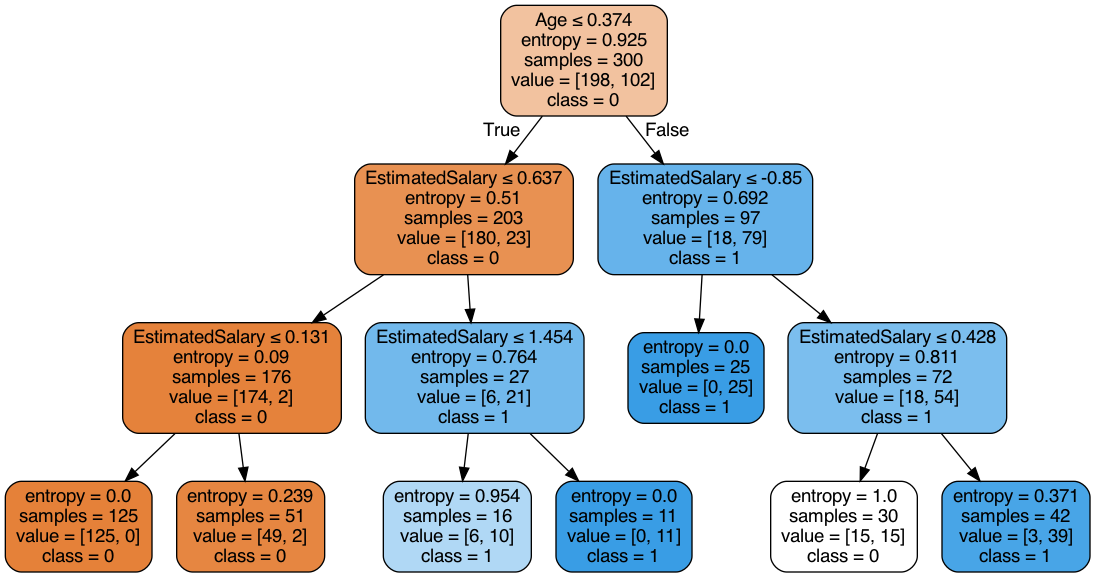

In [14]:
# Visualization of the tree
dot_data = io.StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())